- 차원축소
    - 여러 특징을 더 적은 차원 (예: 2차원, 3차원, ..)으로 줄이기
    - 512 * 512 = 25000~ => 50 ~ 100 정도 차원 (손실이 생각보다 많이 없다.)
    - 시각화할때만 2차원으로 차원축소 -> 시각화

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 폰트 및 마이너스 깨짐 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
iris_df = pd.DataFrame(
    iris_data.data ,
    columns = iris_data.feature_names
)

iris_df['target'] = iris_data.target

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


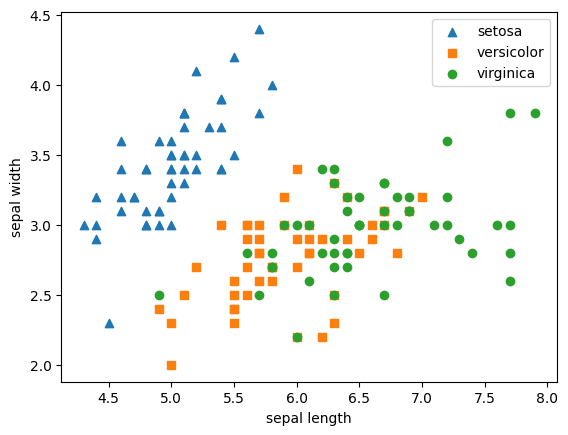

In [8]:
markers = ['^', 's', 'o'] # 클래스별 마커 모양

for i, marker in enumerate(markers):
    x_data = iris_df[iris_data.target == i]['sepal length (cm)'] # 꽃받침 길이
    y_data = iris_df[iris_data.target == i]['sepal width (cm)']  # 꽃받침 너비
    plt.scatter(x_data, y_data, marker=marker, label=iris_data.target_names[i])  # 클래스별 산점도

plt.legend()               # 범례 표시
plt.xlabel('sepal length') # x축 라벨
plt.ylabel('sepal width')  # y축 라벨
plt.show()

특성 2개만 확인했기 때문에 겹치는 데이터가 있다.

In [9]:
# 차원 축소 전 스케일링 진행
from sklearn.preprocessing import StandardScaler  # 표준화 도구

scaler = StandardScaler()                                         # 스케일러 객체 생성
scaler.fit(iris_df.drop('target', axis=1))                        # 입력 특성 기준으로 평균/표준편차 학습
iris_scaled = scaler.transform(iris_df.drop('target', axis = 1))  # 특성 데이터 표준화

iris_scaled


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [10]:
# PCA를 사용해서 4차원 특성 데이터를 2차원으로 축소 (중점: 정보 손실을 최소화)
from sklearn.decomposition import PCA  # 주성분분석(PCA)

pca = PCA(n_components = 2)           # 2차원으로 축소
pca.fit(iris_scaled)                  # 주성분 학습
iris_pca = pca.transform(iris_scaled) # 데이터 차원 축소

iris_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

- 차원 축소 후 성능은 좋아질 수도 있고, 나빠질 수도 있다.
    - 좋아질 가능성이 더 높을때는 차원이 엄청 많을때 (예: ~만개)
    - 나빠질 가능성이 더 높을때는 차원이 별로 없는데 차원 축소를 진행하여 정보손실이 일어난 경우

In [13]:
irispca_df = pd.DataFrame(
    iris_pca,
    columns = ['pca_component_1', 'pca_component_2'] # PCA로 축소된 두 주성분
)
irispca_df['target'] = iris_data.target  # 클래스 라벨 추가

irispca_df

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


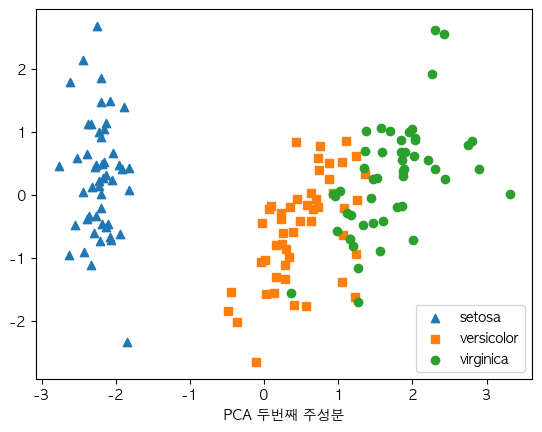

In [22]:
# 시각화
for i, marker in enumerate(markers):
    x_data = irispca_df[irispca_df['target'] == i]['pca_component_1']           # 첫번째 주성분
    y_data = irispca_df[irispca_df['target'] == i]['pca_component_2']           # 두번째 주성분
    plt.scatter(x_data, y_data, marker=marker, label=iris_data.target_names[i]) # 클래스별 산점도
plt.legend()
plt.xlabel('PCA 첫번째 주성분')
plt.xlabel('PCA 두번째 주성분')
plt.show()

- LDA
    - 클래스 정보를 활용해 클래스 간 분리를 최대화, 클래스 내 분산을 최소화하는 방향으로 차원을 축소

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()                            # 2차원으로 축소
lda.fit(iris_scaled, iris_data.target) # 라벨 정보를 이용해서 학습
iris_lda = lda.transform(iris_scaled)  # LDA로 자원 축소

irislda_df = pd.DataFrame(
    iris_lda,
    columns=['lda_component_1', 'lda_component_2']
)

irislda_df['target'] = iris_data.target

irislda_df



,lda_component_1,lda_component_2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0
...,...,...,...
145,-5.645003,1.677717,2
146,-5.179565,-0.363475,2
147,-4.967741,0.821141,2
148,-5.886145,2.345091,2


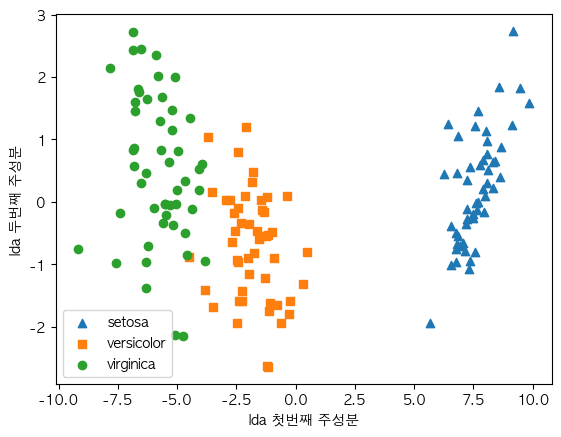

In [23]:
# 시각화
for i, marker in enumerate(markers):
    x_data = irislda_df[irislda_df['target'] == i]['lda_component_1']           # 첫번째 주성분
    y_data = irislda_df[irislda_df['target'] == i]['lda_component_2']           # 두번째 주성분
    plt.scatter(x_data, y_data, marker=marker, label=iris_data.target_names[i]) # 클래스별 산점도
plt.legend()
plt.xlabel('lda 첫번째 주성분')
plt.ylabel('lda 두번째 주성분')
plt.show()

LDA로 축소한 결과가 PCA로 축소한 결과보다 클래스간 분리가 더 뚜렷하게 나타났다.

=== 새로운 데이터셋으로 차원축소 진행 ===

In [25]:
import pandas as pd

df = pd.read_excel(
    './data/pca_credit_card.xls',  # 신영카드 데이터 파일
    header = 1,                    # 두번째 행을 컬럼명으로 사용
    sheet_name = 'Data' 
)

df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [26]:
df.info

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  

In [27]:
df.rename(
    columns = {
        'PAY_0':'PAY_1',
        'default payment next month':'default'
        },
    inplace = True
)

df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


- 단변량(일변랑), 다변량 확인
    - 일변량: 각 컬럼의 분포 및 이상 여부 확인
    - 다변량: 변수 간 상관관계 분석

In [28]:
# 분석에 상관없는 ID 컬럼 제거
df.drop('ID', axis=1, inplace=True)

df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [29]:
# X_data, y_data 나누기
X_data = df.drop('default', axis = 1) # 입력특성 x
X_data 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [30]:
y_data = df['default']   # 타겟변수 y
y_data

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

In [31]:
# 피어슨 상관계수 : 1, -1에 가까울 수록 강한 상관관계. 0에 가까울수록 상관관계가 없다.
corr = X_data.corr()
corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027


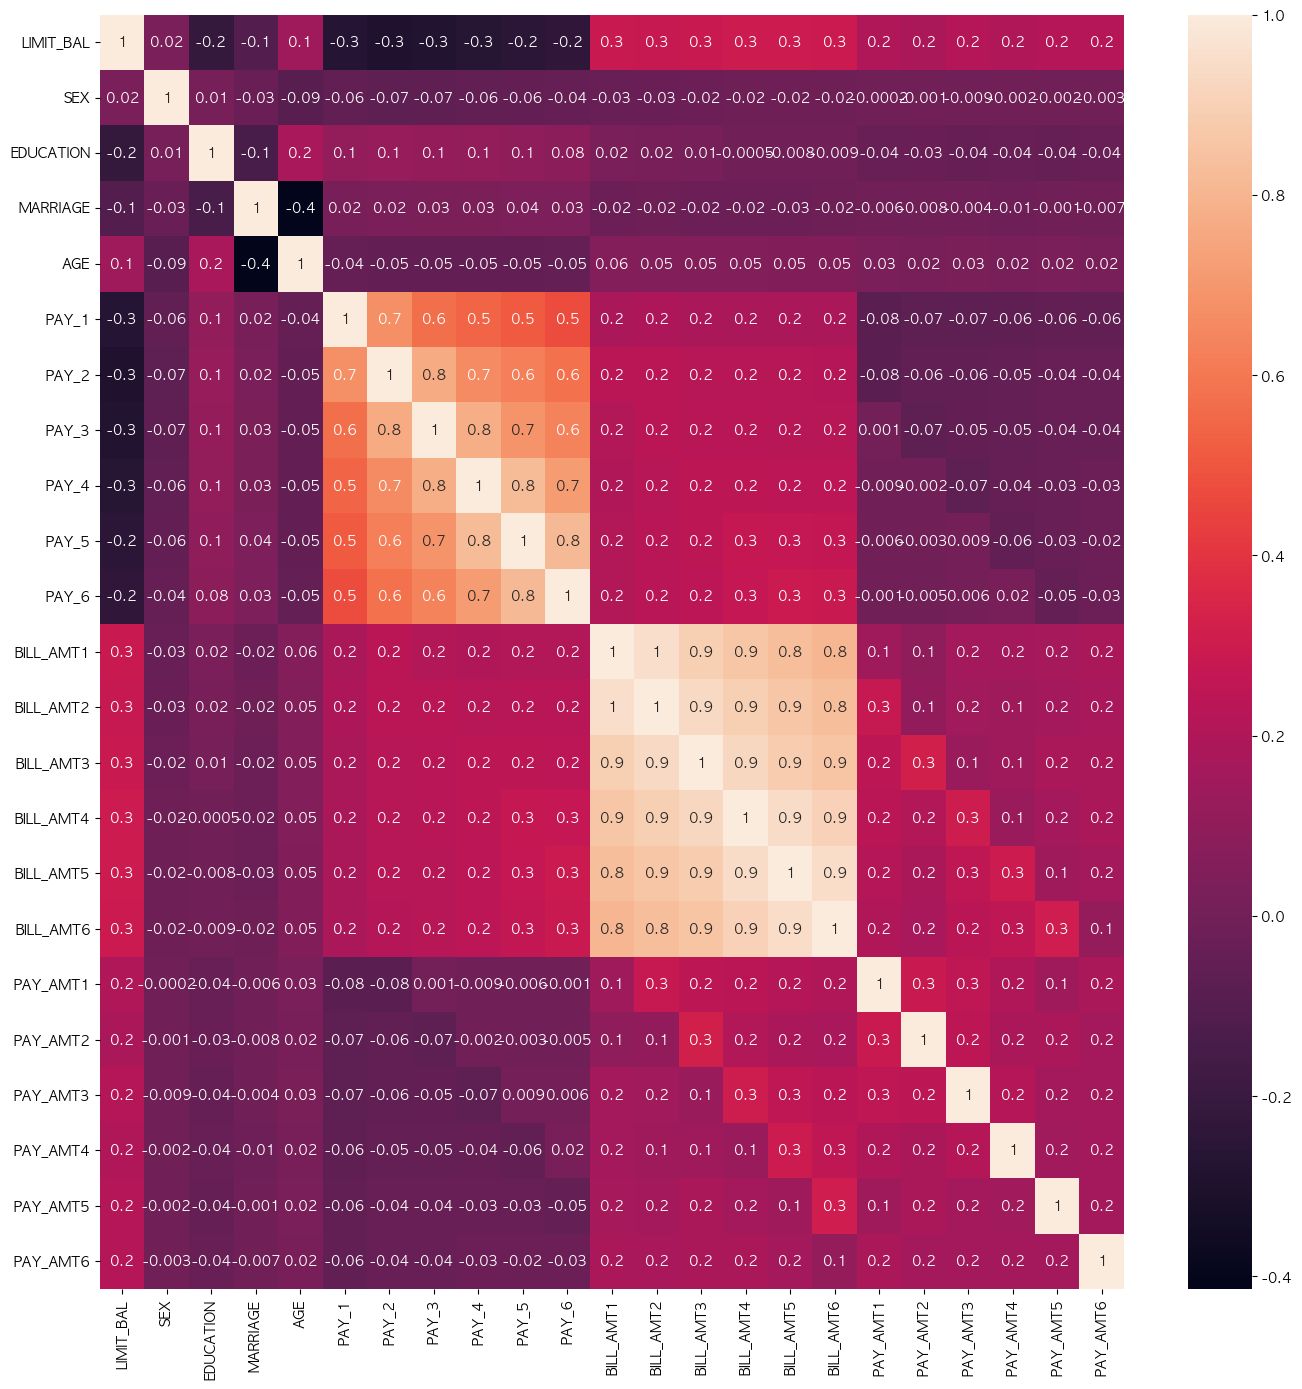

In [36]:
# heatmap으로 시각화
import seaborn as sns
import matplotlib.pyplot as pyplot

plt.figure(figsize=(14, 14))
sns.heatmap(
    corr,       # 상관계수
    annot=True, # 내부값 표시
    fmt='.1g'   # 유효숫자 1자리
)
plt.tight_layout()
plt.show()

BILL_AMT1 ~ BILL_AMT6는 강한 상관관계를 가지고 있어 차원축소(PCA 등)을 적용하면 성능이 개선될 것으로 가능성이 있다.

In [39]:
X_data.iloc[:, 11:17].values

array([[ 3913,  3102,   689,     0,     0,     0],
       [ 2682,  1725,  2682,  3272,  3455,  3261],
       [29239, 14027, 13559, 14331, 14948, 15549],
       ...,
       [ 3565,  3356,  2758, 20878, 20582, 19357],
       [-1645, 78379, 76304, 52774, 11855, 48944],
       [47929, 48905, 49764, 36535, 32428, 15313]], shape=(30000, 6))

In [41]:
# 차원 축소 전ㅂ 데이터 스케일링
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit(X_data.iloc[:, 11:17])
X_scaled = scaler.transform(X_data.iloc[:, 11:17])

X_scaled

array([[-0.64250107, -0.64739923, -0.66799331, -0.67249727, -0.66305853,
        -0.65272422],
       [-0.65921875, -0.66674657, -0.63925429, -0.62163594, -0.60622927,
        -0.59796638],
       [-0.29855966, -0.49389911, -0.48240819, -0.44973025, -0.41718767,
        -0.39162956],
       ...,
       [-0.64722711, -0.64383044, -0.63815838, -0.34796096, -0.32451732,
        -0.32768664],
       [-0.71798186,  0.41026929,  0.42237335,  0.14784373, -0.46806261,
         0.16913036],
       [-0.04473888, -0.00385085,  0.03966713, -0.10458204, -0.12966943,
        -0.39559241]], shape=(30000, 6))

In [42]:
# 6개 특성을 2개 주성분으로 차원 축소
pca = PCA(n_components = 2)     # 2차원으로 축소
pca.fit(X_scaled)               # 주성분 학습
X_pca = pca.transform(X_scaled) # 차원 축소 적용

X_pca

array([[-1.61114812,  0.01247912],
       [-1.54759523, -0.06234401],
       [-1.03587378,  0.01125622],
       ...,
       [-1.19551872, -0.3595072 ],
       [-0.00829343, -0.04995798],
       [-0.25828552,  0.26525237]], shape=(30000, 2))

- 설명 분산 비율
    - 차원 축소가 정보를 얼마나 보존했는지를 판단한다.

In [43]:
pca.explained_variance_ratio_ # 각 주성분이 설명하는 분산 비율

array([0.90555253, 0.0509867 ])

<div style="text-align: center;">
    6개 -> 2개 차원으로 축소했을 떄 전체 분산의 약 95%를 설명.<br>   
    분산 비율이 너무 낮으면 차원 축소로 인해 성능이 저하될 가능성이 있다.
</div>

In [45]:
# 차원 축소 전 vs 후 성능 비교
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 차원축소 전
X_train, X_test, y_train, y_test = train_test_split(
    X_data.iloc[:, 11:17], # 차원축소 전 원본 특성
    y_data,                # 타겟변수
    test_size=0.2,         # 테스트 데이터 비율
    random_state=42
)

model = LogisticRegression()  # 로지스틱 회귀 모델 (반복횟수 1000)
model.fit(X_train, y_train)   # 테스트 데이터 학습
pred = model.predict(X_test)  # 예측

accuracy_score(y_test, pred)

0.7811666666666667

In [46]:
# 차원축소 후
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca,                 # PCA로 차원축소된 특성
    y_data,                # 타겟변수
    test_size=0.2,         # 테스트 데이터 비율
    random_state=42
)

model.fit(X_train_pca, y_train)   # # PCA 적용데이터로 모델 학습
pred_pca = model.predict(X_test_pca)  # 예측

accuracy_score(y_test, pred_pca)

0.7811666666666667

<div style="text-align: center;">차원 축소를 해서 성능이 올라갈 수도 있고, 내려갈 수도 있다</div>

In [47]:
X_pca.shape # PCA 결과가 제대로 바뀜

(30000, 2)

In [48]:
pca.explained_variance_ratio_.sum()  # 95% 이상이면 정상적으로 차원축소됨

np.float64(0.9565392265911001)

In [49]:
# 전 후 예측값이 완전히 같은지 확인
(pred == pred_pca).mean()  # 1이 나오면 예측값이 완전히 동일하다

np.float64(1.0)